In [1]:
# Pandas & Numpy
import pandas as pd
import numpy as np

# Plotting libraries - Matplotlib, Seaborn & Plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly
from plotly import tools
import plotly.express as px
from wordcloud import WordCloud
# Filtering out warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# pip install wordcloud

In [3]:
inp = pd.read_csv('Downloads/AB_NYC_2019.csv')
inp.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,05-10-2017,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,24-06-2019,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,21-07-2017,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,09-06-2019,1.33,4,188


In [4]:
inp.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0



Checking the columns in the dataset and its datatypes

In [5]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
inp.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Checking for Number of Records

In [7]:
inp.shape
print("Number of Records/rows in the dataset: ",inp.shape[0])
print("Number of Fields/columns in the dataset: ",inp.shape[1])

Number of Records/rows in the dataset:  48895
Number of Fields/columns in the dataset:  16


In [8]:
# Checking Duplicates
inp.duplicated().sum()

0

###### Function to check missing values

In [9]:
def prcnt_missing(df):
    return round(df.isnull().sum()/len(df)*100,2)

prcnt_missing(inp)

id                                 0.00
name                               0.03
host_id                            0.00
host_name                          0.04
neighbourhood_group                0.00
neighbourhood                      0.00
latitude                           0.00
longitude                          0.00
room_type                          0.00
price                              0.00
minimum_nights                     0.00
number_of_reviews                  0.00
last_review                       20.56
reviews_per_month                 20.56
calculated_host_listings_count     0.00
availability_365                   0.00
dtype: float64

In [10]:
# Columns with missing values
print(prcnt_missing(inp)[prcnt_missing(inp) > 0])

name                  0.03
host_name             0.04
last_review          20.56
reviews_per_month    20.56
dtype: float64


Handling Missing values

<font size=2>In our dataset, the Missing values is majorly in columns <b>reviews_per_month</b> & <b>last_review</b>.

In [11]:
inp["reviews_per_month"].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

<font size=2>In order to impute the missing values in this column, we first need to check if there are any outliers in this field.</font>

<font size=2>If we have outliers then we can replace the missing values with <b>median</b>
    else we can replace the missing values with <b>mean</b> of the values.</font>

In [12]:
# Checking for outliers in the dataset
Q1 = inp["reviews_per_month"].quantile(0.25)
Q3 = inp["reviews_per_month"].quantile(0.75)
Q4 = inp["reviews_per_month"].quantile(0.95)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
if (inp["reviews_per_month"].max() - upper == 0) or (abs(inp["reviews_per_month"].min()) - abs(lower)== 0):
    print("we dont have outliers")
else:
     print("we have outliers")   

we have outliers


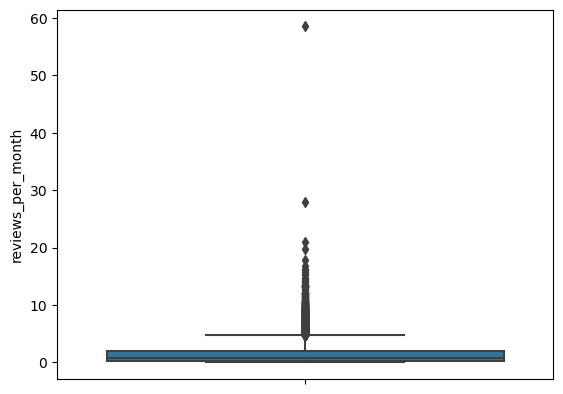

In [13]:
sns.boxplot(data=inp,y="reviews_per_month")
plt.show()

<font size=2>From the above 2 outputs, we can see that we have outliers in the dataset, then we can impute the missing values with median.</font>

In [14]:
inp['reviews_per_month'] = inp['reviews_per_month'].fillna(inp
                                                           ['reviews_per_month'].median())
prcnt_missing(inp["reviews_per_month"])

0.0

In [15]:
# Droping the columns that are not significant for further analysis
inp.drop(["id","name","host_name","last_review"],axis=1,inplace=True)

In [16]:
prcnt_missing(inp)

host_id                           0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

### Univariate Analysis 

In [17]:
# Pie and Bar plotinng funciton
def pie_count(df,column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(10,7), dpi= 80)
    
    plt.subplot(2, 1, 1)
    df[column].value_counts().dropna().plot.pie(autopct = "%1.0f%%")
    plt.title(f"Pie Chart of {column}")
    plt.ylabel("")
    
    ax=plt.subplot(2,1,2)
    df[column].value_counts().plot.bar(width = 0.4)
    plt.title(f"Bar Chart of {column}")
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(df))*100), (p.get_x()+0.2, p.get_height()+100), ha='center')
    
    
    plt.legend()
    
    plt.show()

In [18]:
# countplot function
def countplot(df,column):
    plt.figure(figsize=[20,7])
    ax=df[column].value_counts().plot.bar(width = 0.5)
    plt.title(f"{column} Distribution ",fontdict={'fontsize':20})

    for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(df))*100), (p.get_x()+0.2, p.get_height()+100), ha='center')


    plt.legend()

    plt.show()

In [19]:
def Numerical_box_hist(dataframe, column):
    sns.set(style='darkgrid')
    plt.figure(figsize=(25,5), dpi= 80)
    
    plt.subplot(1, 3, 1)
    sns.boxplot(data=dataframe, x=column, orient='h')
    plt.title(f'Box Plot for column {column}',fontdict={'fontsize':16,'fontweight':3})
    
    plt.subplot(1, 3, 2)
    sns.histplot(dataframe[column].dropna(),bins=10)
    plt.title(f'Hist Plot for column {column}',fontdict={'fontsize':16,'fontweight':3})
    plt.show()

Neighbourhood & Neighbourhood group

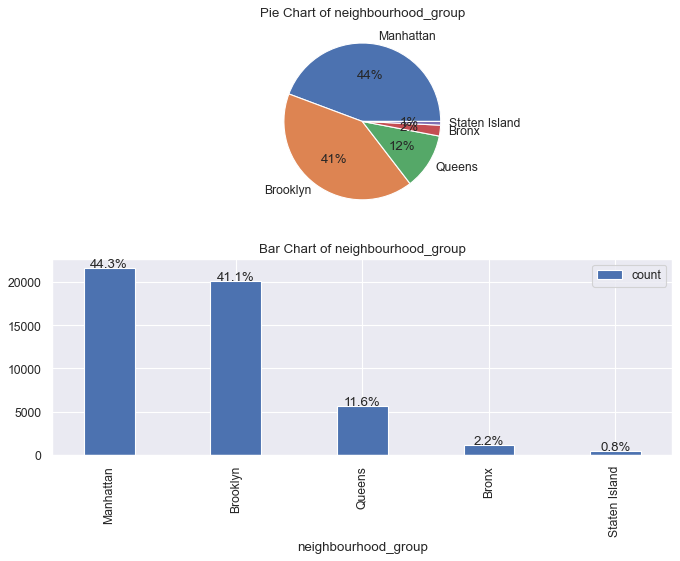

In [20]:
pie_count(inp,"neighbourhood_group")

<font size=3><b>Manhattan & Brooklyn</b> neighbourhood groups seems to have higher share of listings when compared to other groups</font>

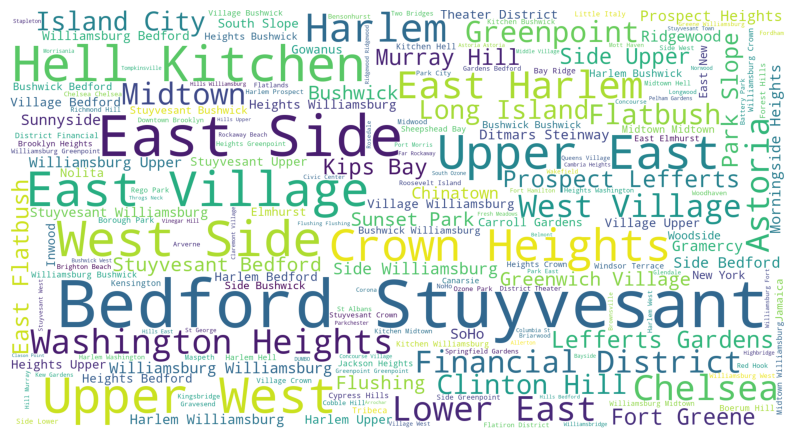

In [21]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=2000,height=1080).generate(" ".join(inp.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<Axes: ylabel='count'>

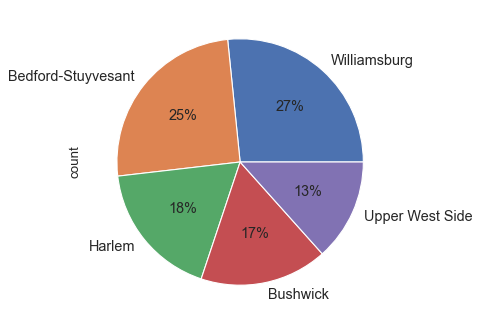

In [22]:
fig = plt.figure(figsize=(5,5), dpi=80)
inp['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

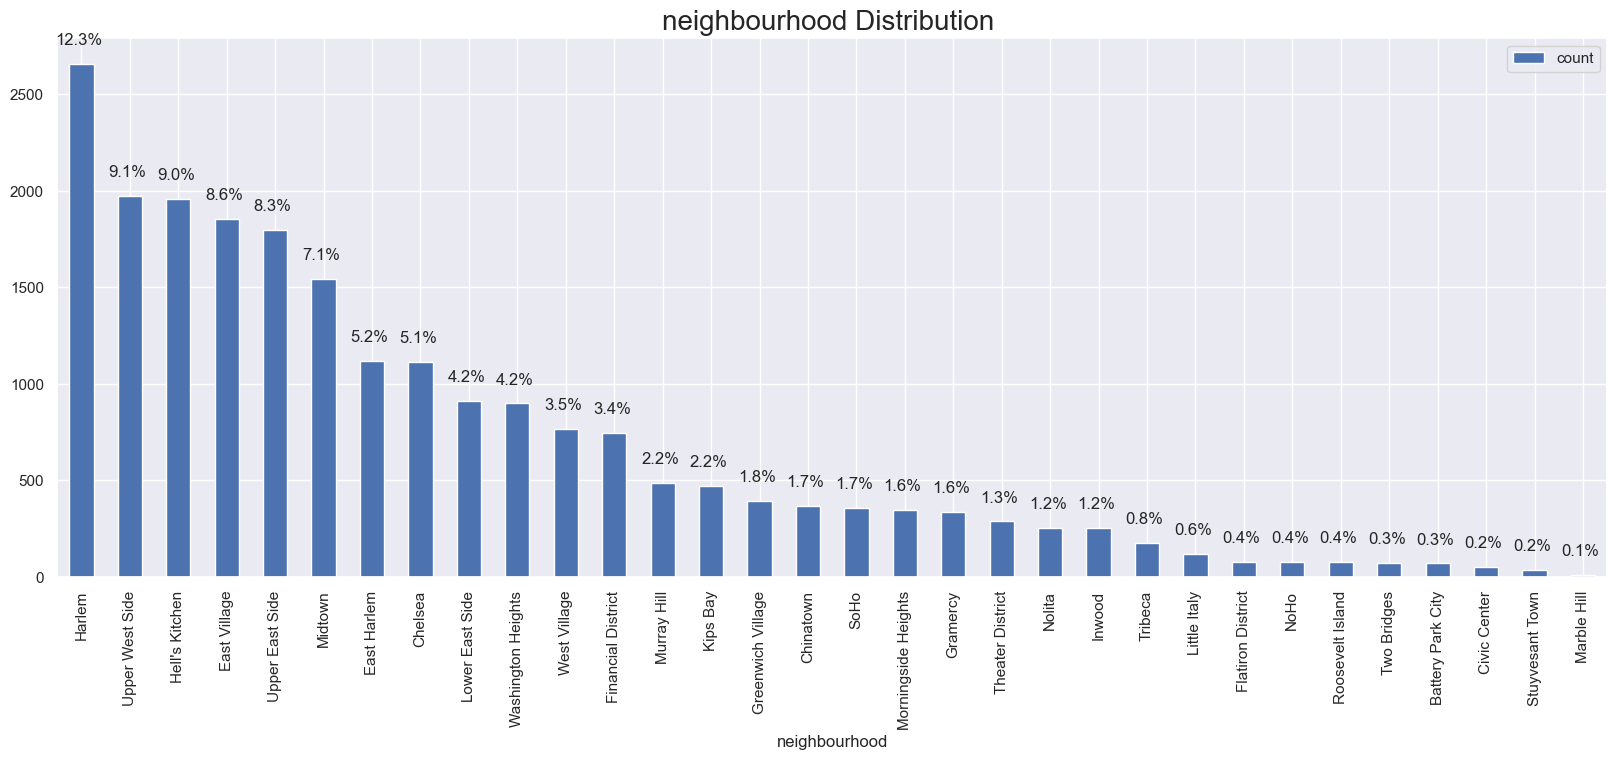

In [23]:
countplot(inp[inp["neighbourhood_group"]=="Manhattan"],"neighbourhood")

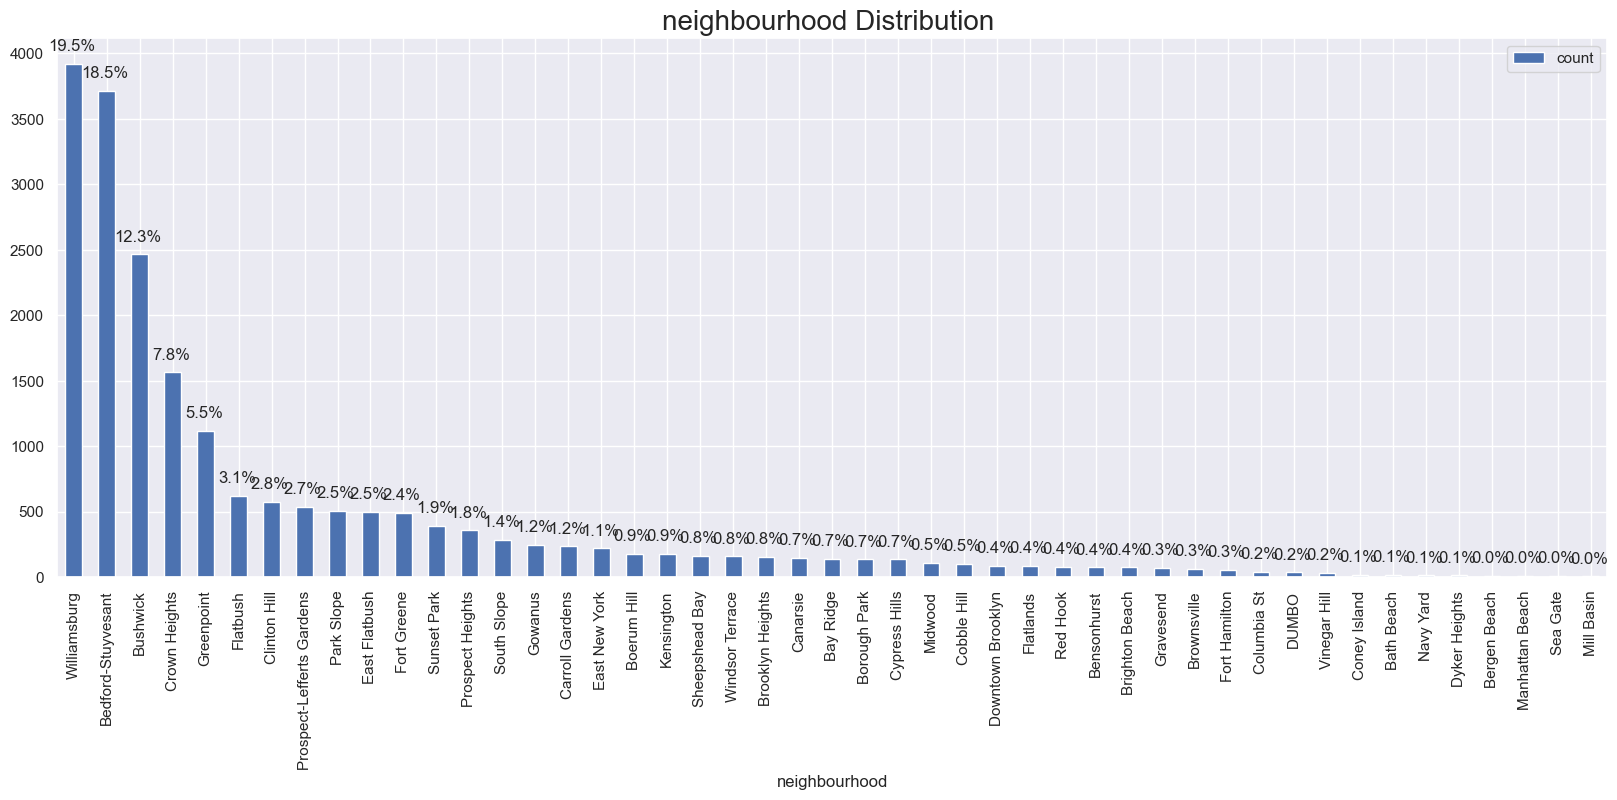

In [24]:
countplot(inp[inp["neighbourhood_group"]=="Brooklyn"],"neighbourhood")

<font size=3><b>Harlem & Williamsburg</b> neighbourhood has more number of listings among all the neighbourhoods</font>

<Axes: ylabel='count'>

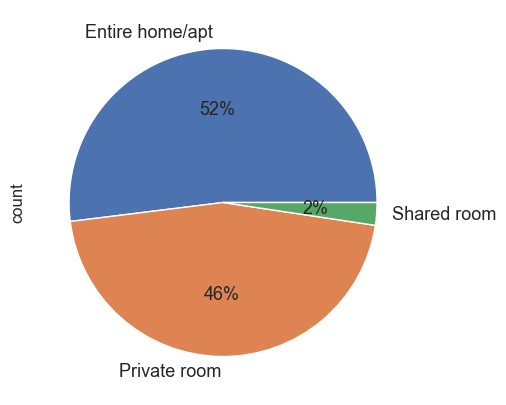

In [25]:
fig = plt.figure(figsize=(5,5), dpi=100)
inp['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

In [26]:
df_arbnb=inp

<font size=3><b>Entire home/apt</b> is most common type of rooms offered by hosts followe by Private room</font>

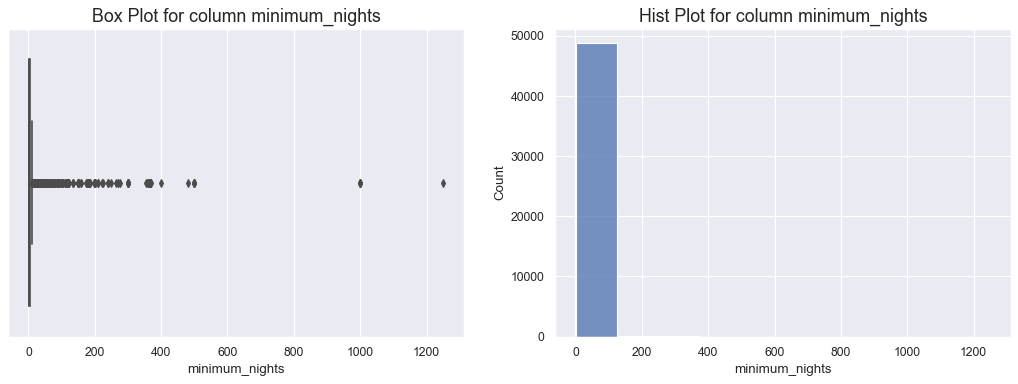

In [27]:
Numerical_box_hist(df_arbnb,"minimum_nights")

In [28]:
q1 = df_arbnb["minimum_nights"].quantile(0.5)
q2 = df_arbnb["minimum_nights"].quantile(0.75)
q3 = df_arbnb["minimum_nights"].quantile(0.99)
q4 = df_arbnb["minimum_nights"].max()

In [29]:
print("50 % of the listings offer minimum nights upto : ",q1)
print("75 % of the listings offer minimum nights upto : ",q2)
print("99 % of the listings offer minimum nights upto : ",q3)
print("Max minimum nights offered in the datase : ",q4)

50 % of the listings offer minimum nights upto :  3.0
75 % of the listings offer minimum nights upto :  5.0
99 % of the listings offer minimum nights upto :  45.0
Max minimum nights offered in the datase :  1250


<font size=3>As seen in the above output, 99% of the listings offer upto 45 minimum nights, but there are some outliers as well in the datasets</font>

In [30]:
price_val = df_arbnb.price.value_counts().iloc[:10].copy().to_frame()
price_val.reset_index(inplace=True)
print(price_val.columns)
price_val.rename(columns={'count':'top10price', 'price':'Price_count'}, inplace=True)
# price_val.columns

Index(['price', 'count'], dtype='object')


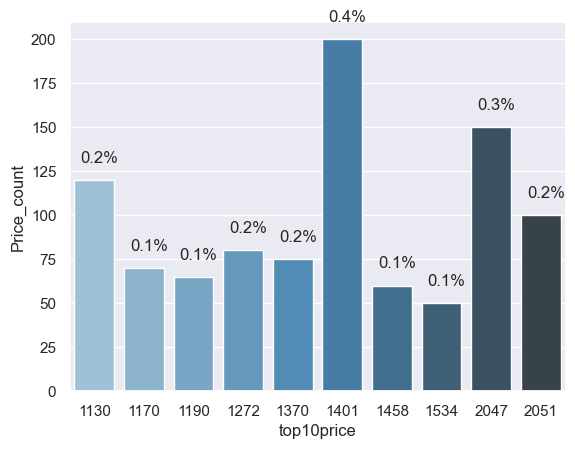

In [31]:
ax=sns.barplot(data=price_val, x="top10price", y="Price_count",palette='Blues_d')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(df_arbnb))*100), (p.get_x()+0.5, p.get_height()+10), ha='center')
sns.set(rc={'figure.figsize':(10,8)})

In [32]:
df_arbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [33]:
q1 = df_arbnb["price"].quantile(0.5)
q2 = df_arbnb["price"].quantile(0.75)
q3 = df_arbnb["price"].quantile(0.99)
q4 = df_arbnb["price"].max()
print("50 % of the listings offer minimum nights upto : ",q1)
print("75 % of the listings offer minimum nights upto : ",q2)
print("99 % of the listings offer minimum nights upto : ",q3)
print("Max minimum nights offered in the datase : ",q4)

50 % of the listings offer minimum nights upto :  106.0
75 % of the listings offer minimum nights upto :  175.0
99 % of the listings offer minimum nights upto :  799.0
Max minimum nights offered in the datase :  10000


<font size=3> The average pricing of the listings is 152 dollors and 75% of the listings are under the price of 175 dollars.</font>

### Bivariate & Multivariate Analysis 

In [34]:
df_arbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [35]:
cols=['neighbourhood_group','neighbourhood','room_type']
temp=df_arbnb[cols]

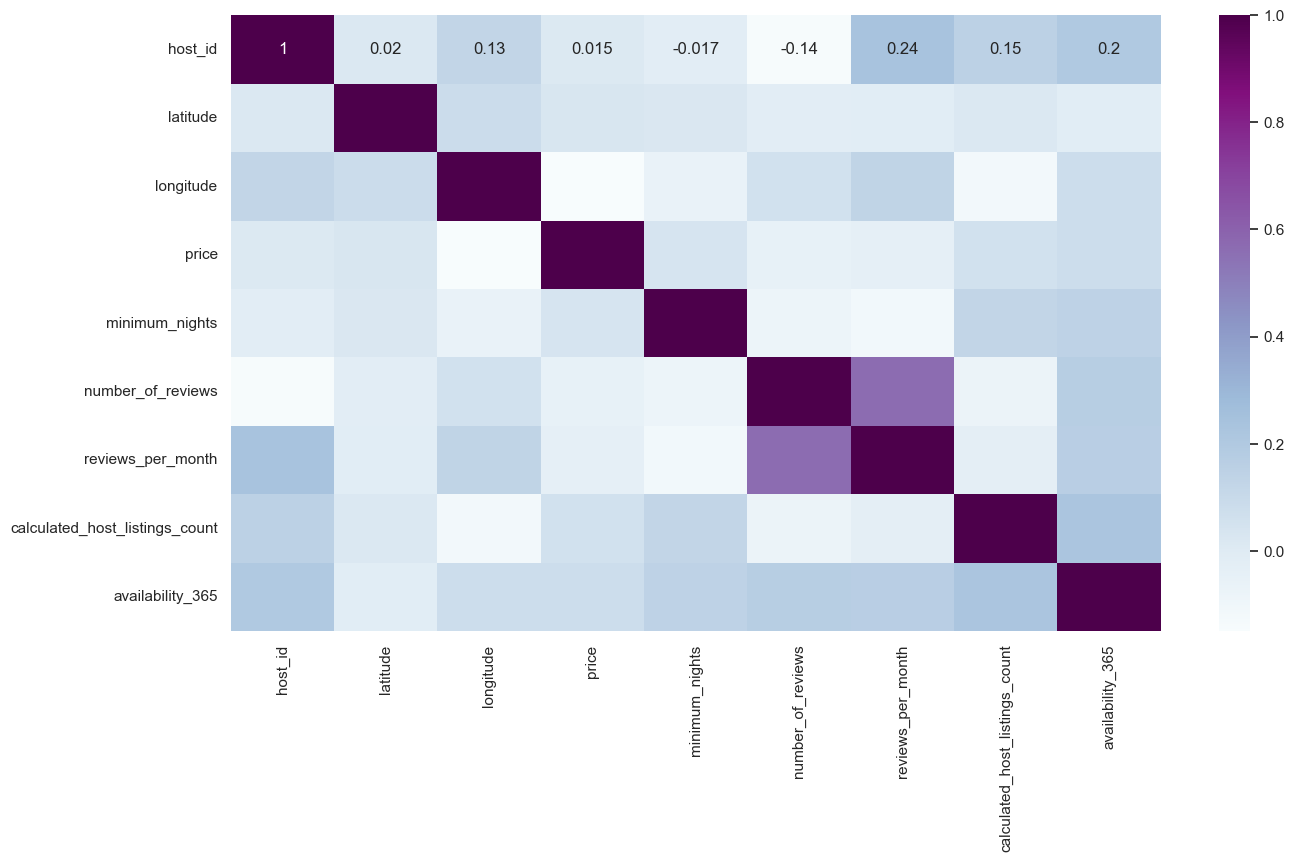

In [36]:
corr = df_arbnb.drop(temp,axis=1).corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True,cmap="BuPu")
plt.show()

In [37]:
df_arbnb.drop(temp,axis=1).corr()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.236499,0.154950,0.203492
latitude,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.014078,0.019517,-0.010983
longitude,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.137153,-0.114713,0.082731
price,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.036814,0.057472,0.081829
minimum_nights,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.109876,0.127960,0.144303
number_of_reviews,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.568177,-0.072376,0.172028
reviews_per_month,0.236499,-0.014078,0.137153,-0.036814,-0.109876,0.568177,1.000000,-0.027097,0.165954
calculated_host_listings_count,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.027097,1.000000,0.225701
availability_365,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.165954,0.225701,1.000000


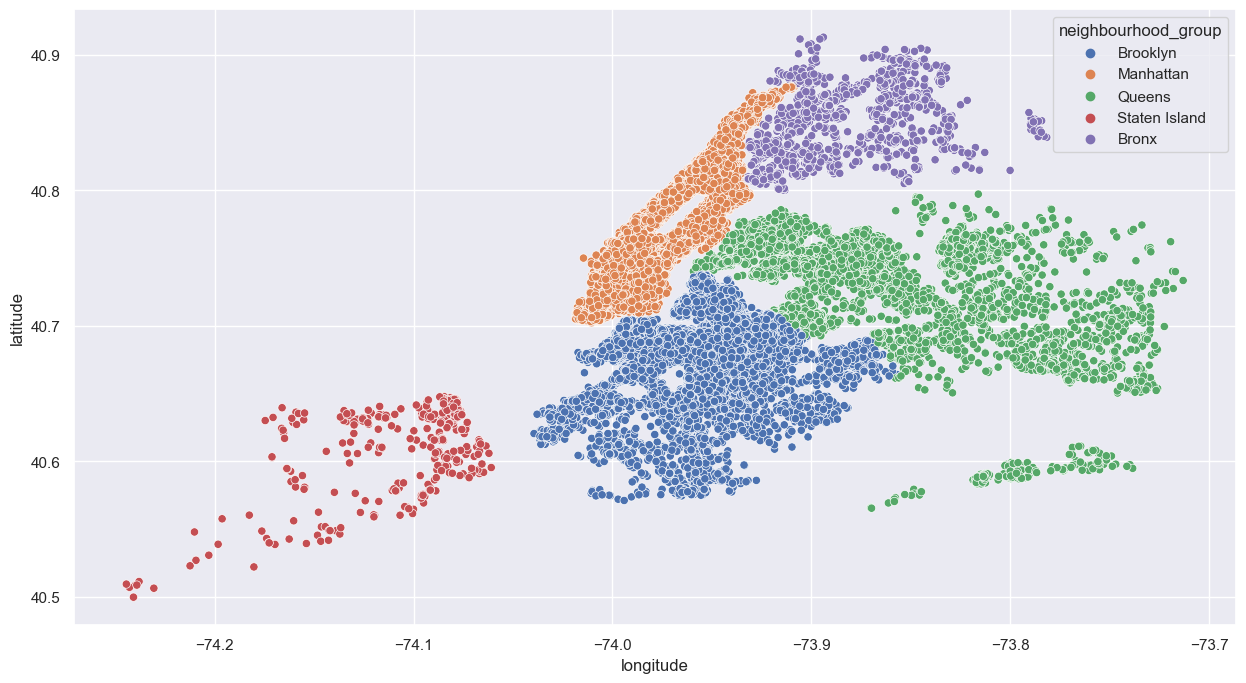

In [38]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_arbnb, x="longitude", y="latitude", hue="neighbourhood_group")
plt.show()

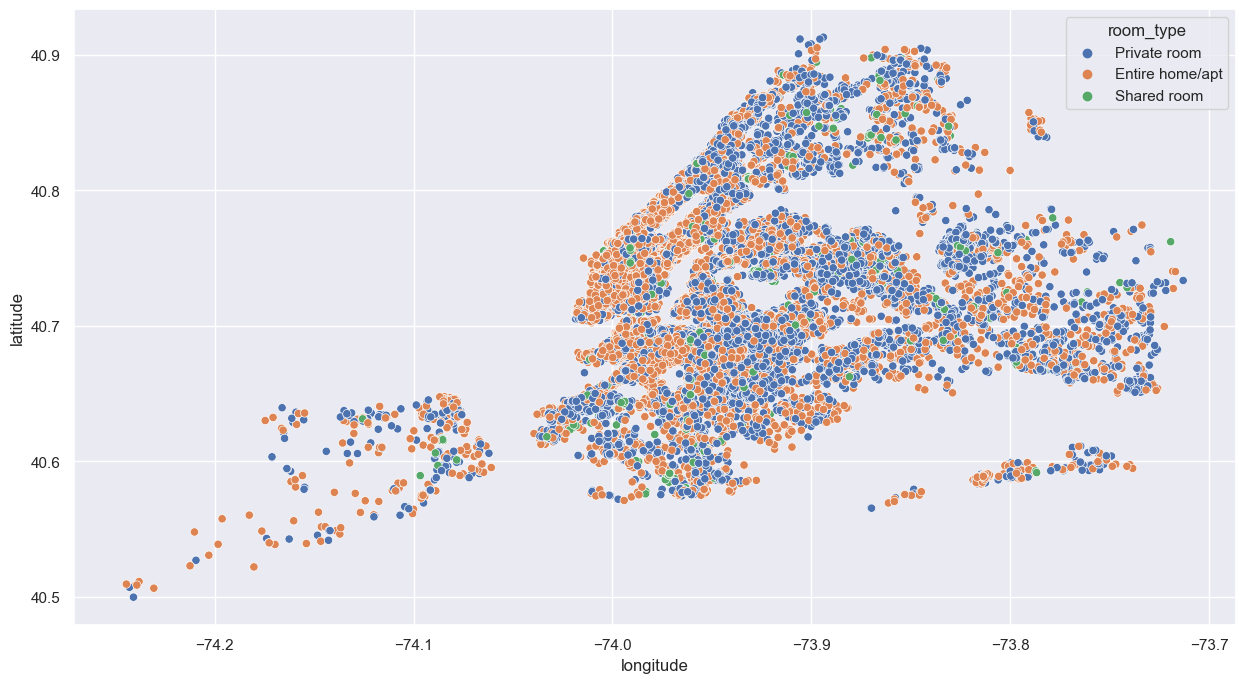

In [39]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_arbnb, x="longitude", y="latitude", hue="room_type")
plt.show()

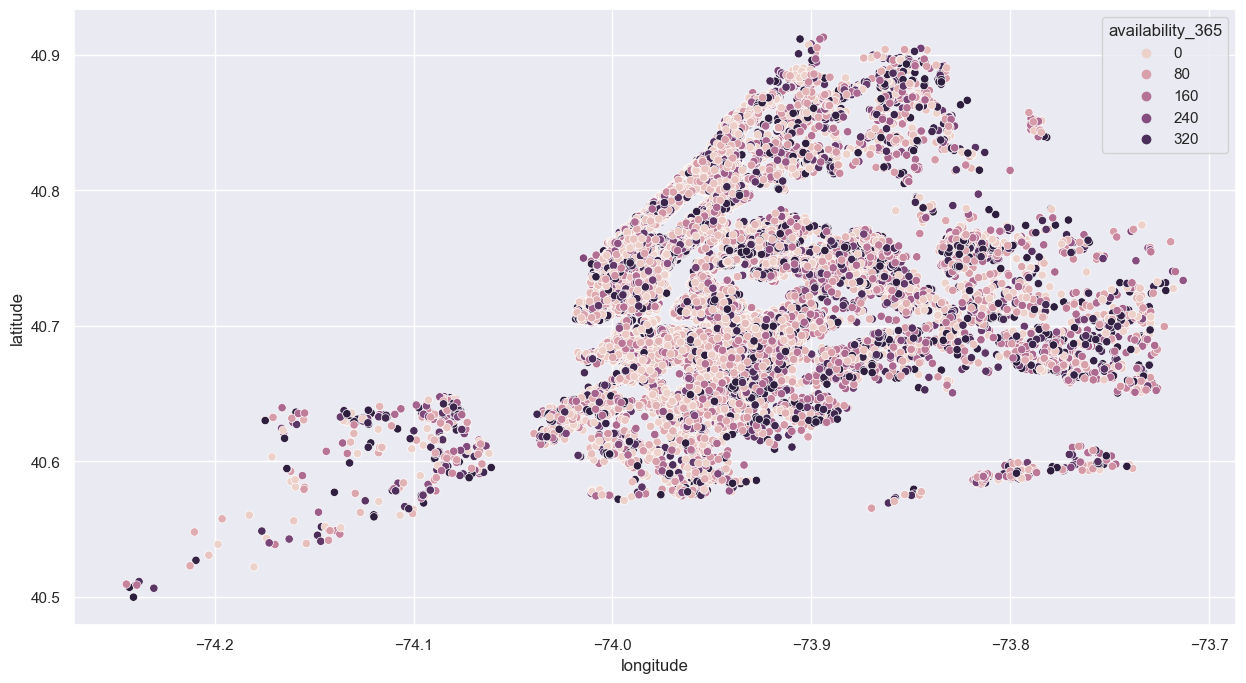

In [40]:

plt.figure(figsize=(15,8))
sns.scatterplot(data=df_arbnb, x="longitude", y="latitude", hue="availability_365")
plt.show()

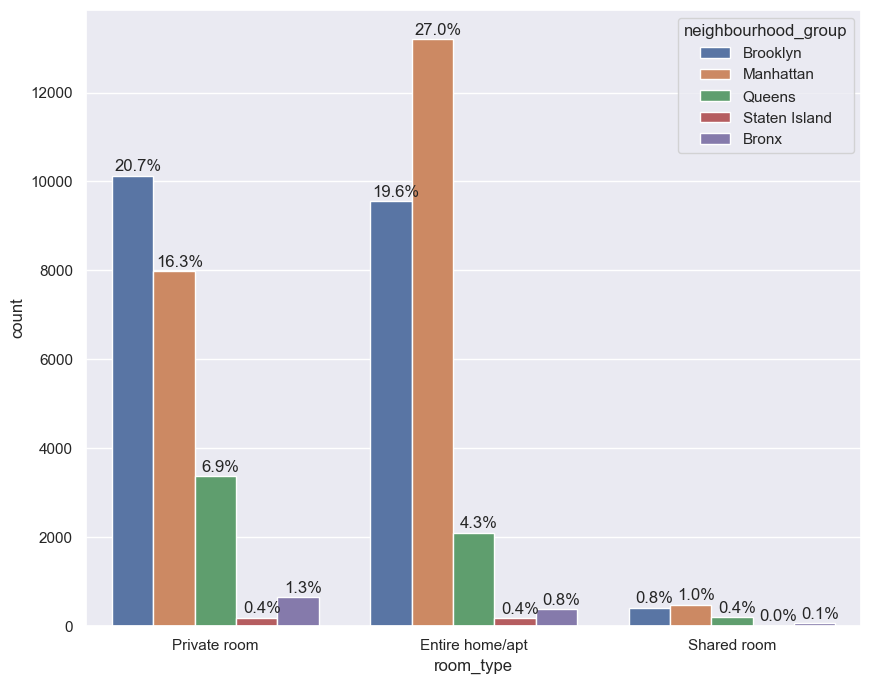

In [41]:
ax=sns.countplot(data = df_arbnb, x = 'room_type', hue = 'neighbourhood_group')
for p in ax.patches:
        ax.annotate('{:.1f}%'.format((p.get_height()/len(df_arbnb))*100), (p.get_x()+.1, p.get_height()+100), ha='center')
sns.set(rc={'figure.figsize':(10,8)})

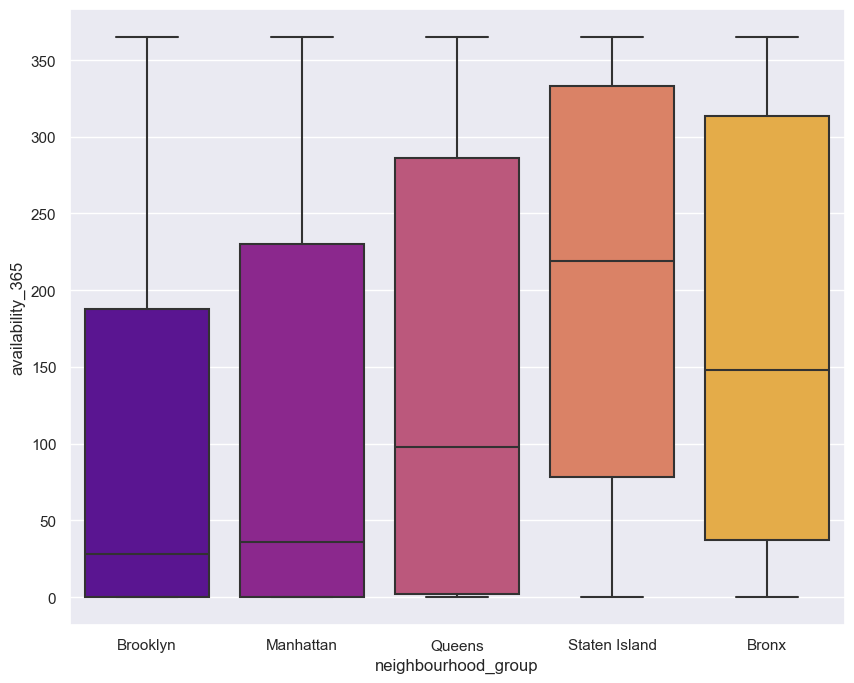

In [42]:
ax = sns.boxplot(data=df_arbnb, x='neighbourhood_group',y='availability_365',palette='plasma')
sns.set(rc={'figure.figsize':(7,6)})

In [43]:
def Multivariate_Plot(data,var1,var2,var3,title):

    
    sns.set_theme(style="darkgrid")
    # plt.style.use('seaborn-darkgrid')
    sns.despine
    fig,ax = plt.subplots(1,1,figsize=(27,10))
    
    sns.boxenplot(x=var1,y = var2, data=data,hue=var3)
    ax.set_ylabel(f'{var2}')
    ax.set_xlabel(f'{var1}')

    ax.set_title(title,fontsize=25)
    ax.set_xticklabels(ax.get_xticklabels(), ha="right")
     
    plt.show()

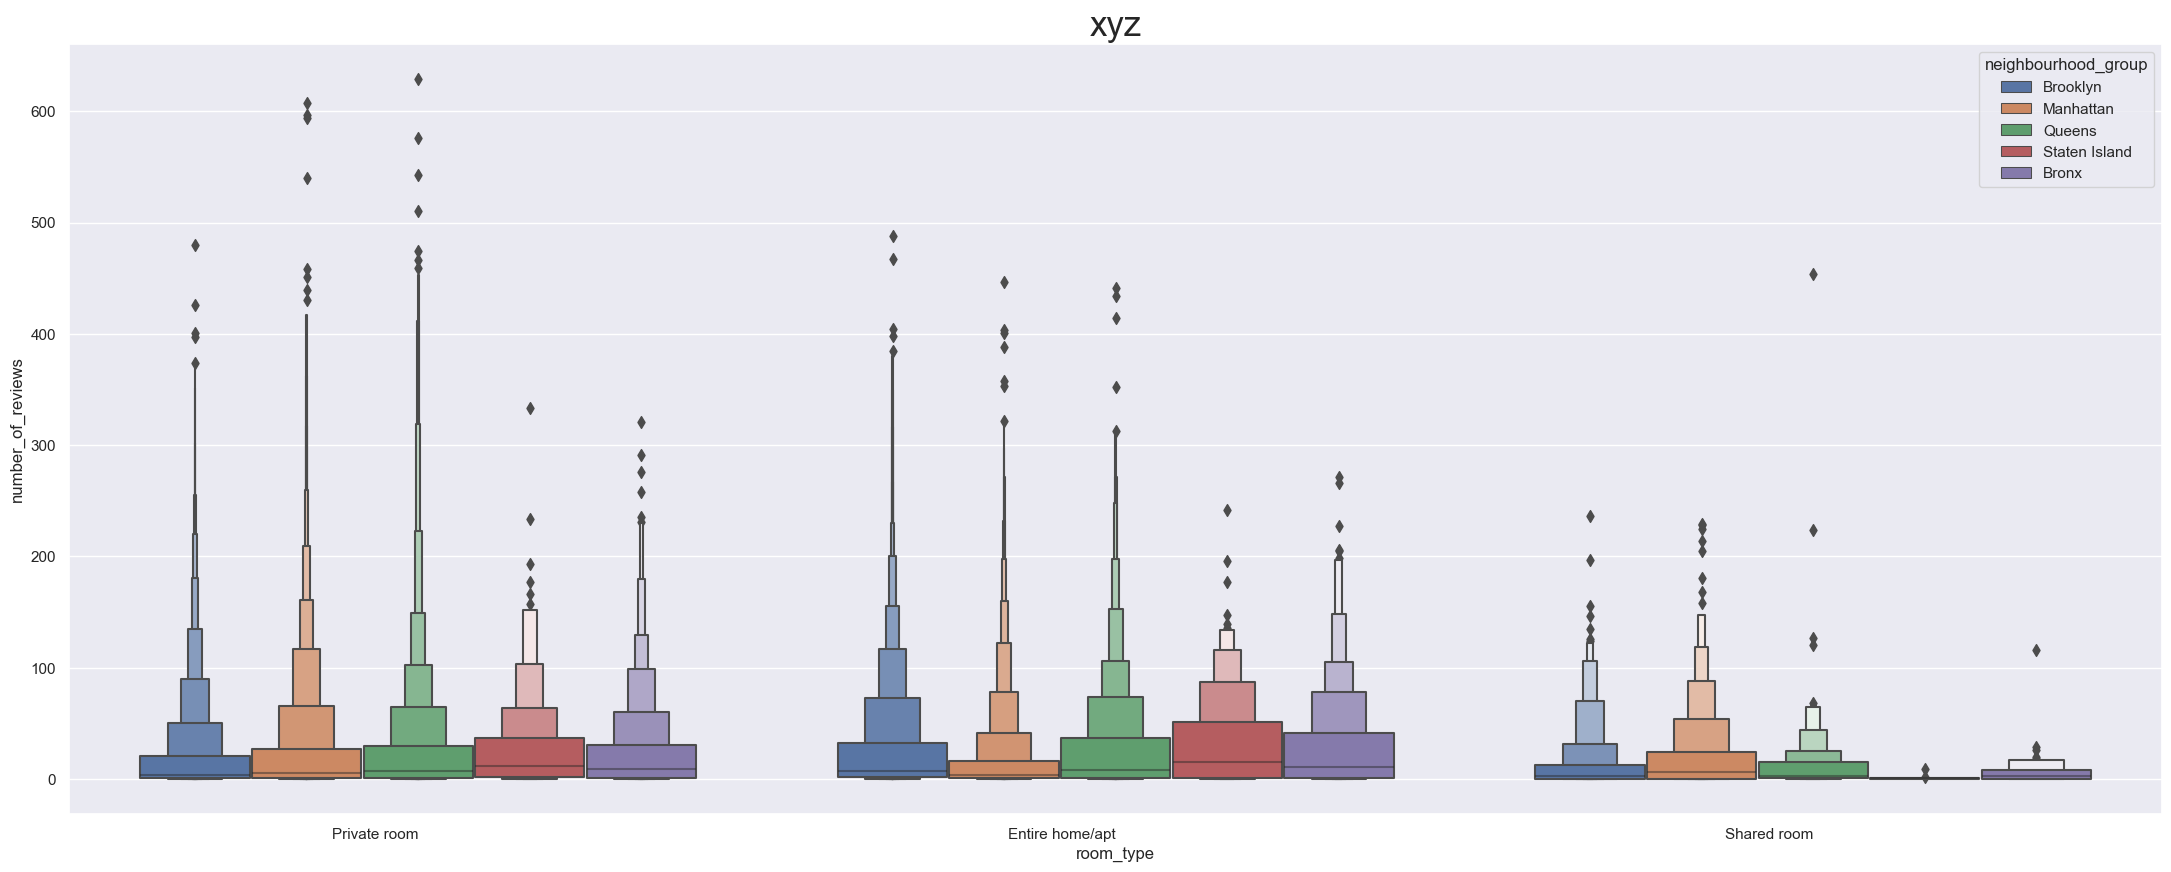

In [44]:
Multivariate_Plot(df_arbnb,"room_type","number_of_reviews","neighbourhood_group","xyz")

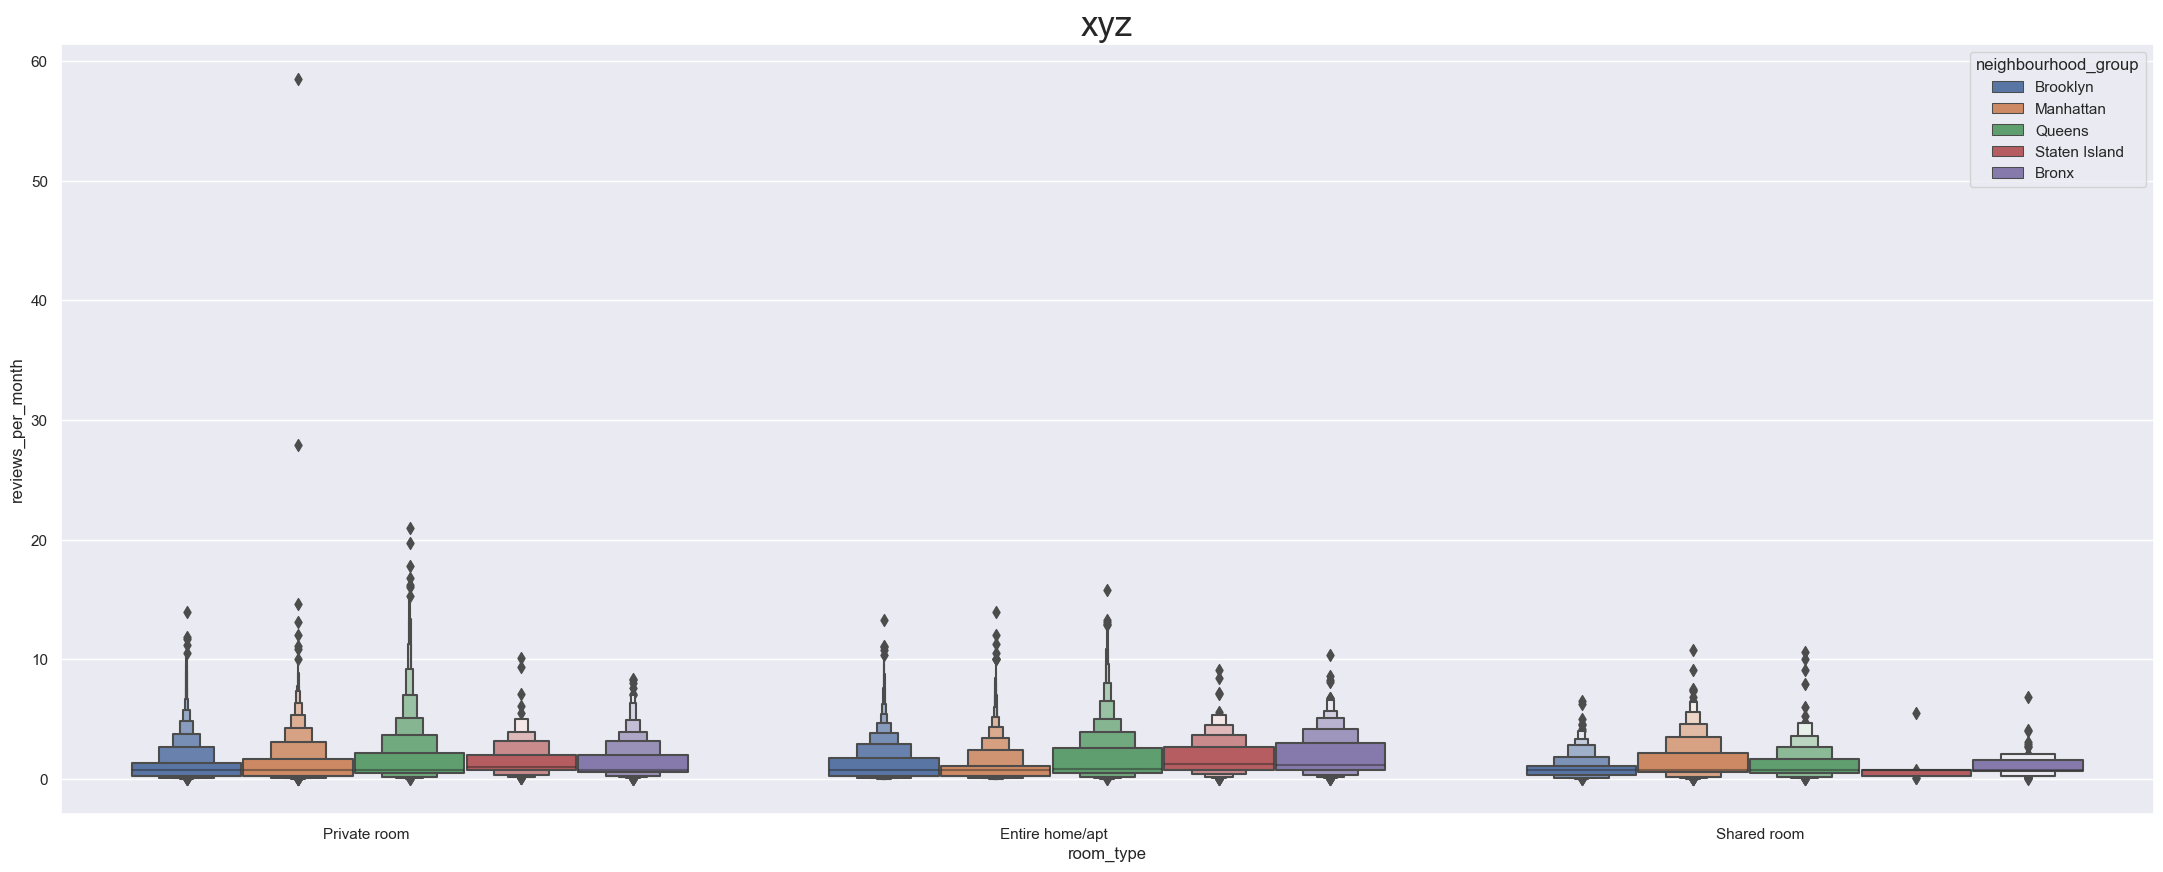

In [45]:
Multivariate_Plot(df_arbnb,"room_type","reviews_per_month","neighbourhood_group","xyz")